### 목표
- 실제 데이터인 mpg 데이터의 특징을 파악하고 분석해보자
- mpg(mile per gallon)는 미국환경 보호국에서 공개된 공공데이터
- 199-2008년 출시된 자동차 234종에 대한 데이터

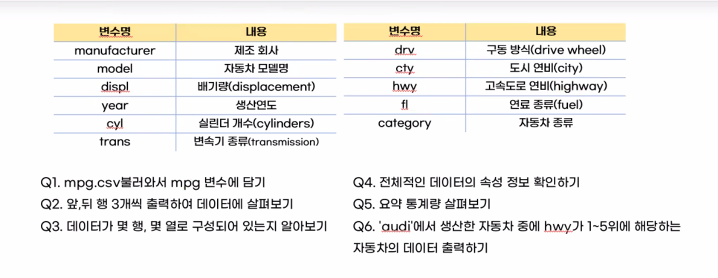

In [1]:
import pandas as pd


In [2]:
# 1. mpg.cvs불러와서 mpg 변수에 담기
mpg = pd.read_csv('.\data\mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [3]:
# 2. 앞, 뒤 행 3개씩 출력하여 데이터에 살펴보기
display(mpg.head(3))
display(mpg.tail(3))

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


In [4]:
# 3. 데이터가 몇 행 몇열로 구성되 어있는지 알아보기

mpg.shape

(234, 11)

In [5]:
# 4. 전체적인 데이터의 속성 정보 확인하기
display(mpg.info())
# 결측치x
# object 문자열
# float 실수
# int 정수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


None

In [6]:
# 5. 요약통계 살펴보기
# describe() :  숫자 형태로 된 컬럼만 출력
mpg.describe()



,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [7]:
# 특정 컬럼만 describe() 할 수 있따!
mpg[['manufacturer', 'model']].describe()

,manufacturer,model
count,234,234
unique,15,38
top,dodge,caravan 2wd
freq,37,11


In [9]:
# 6.audi에서 생산한 자동차 중에 hwy가 1~5위에 해당하는 자동차 데이터 출력하기
# 불리언인덱싱, query(), 2차원.sort_values(by ='컬럼'), head()

# mpg[mpg['manufacturer']=='audi'].sort_values('hwy',ascending=False).head()

mpg.query('manufacturer == "audi"').sort_values(by = 'hwy', ascending=False).head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


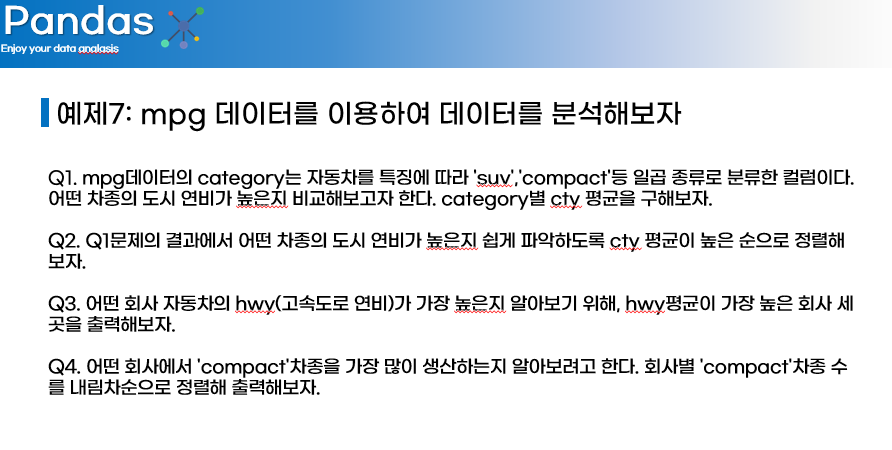

In [45]:
# 1. mpg데이터의 category는 자동차를 특징에 따라 'suv','compact'등 일곱 종류로 분류한 컬럼이다.
# 어떤 차종의 도시 연비가 높은지 비교해보고자 한다. category별 cty평균을 구해보자

mpg.groupby('category')['cty'].mean()
mpg.groupby('category').agg(ctymean = ('cty','mean'))

# 선생님 방법
mpg[['category','cty']].groupby('category').mean()
mpg.groupby('category').agg(cty_mean = ('cty','mean'))

,cty_mean
category,
2seater,15.400000
compact,20.127660
midsize,18.756098
minivan,15.818182
pickup,13.000000
subcompact,20.371429
suv,13.500000


In [23]:
# 2.
mpg.groupby('category')['cty'].mean().sort_values(ascending=False)
mpg.groupby('category').agg(ctymean = ('cty','mean')).sort_values(by='ctymean',ascending=False)


,ctymean
category,
subcompact,20.371429
compact,20.127660
midsize,18.756098
minivan,15.818182
2seater,15.400000
suv,13.500000
pickup,13.000000


In [50]:
# 3.
mpg.groupby('manufacturer').agg(hwy_mean = ('hwy','mean')).sort_values(by='hwy_mean',ascending=False).head(3)
# 선생님 방법
mpg.groupby('manufacturer').agg(hwy_mean = ('hwy','mean')).sort_values(by='hwy_mean',ascending=False).iloc[:3]

,hwy_mean
manufacturer,
honda,32.555556
volkswagen,29.222222
hyundai,26.857143


In [55]:
# 4.
result = mpg.groupby(['manufacturer','category']).agg(man_cont = ('category','count')).sort_values(by='man_cont',ascending=False)
result
result.query('category == "compact"')

# 선생님 방법1
result = mpg[mpg['category'] == 'compact'].groupby('manufacturer').agg(cmp_cnt = ('category','count'))
result.sort_values('cmp_cnt', ascending=False)

# 선생님 방법2
mpg.query('category == "compact"')['manufacturer'].value_counts()

manufacturer
audi          15
volkswagen    14
toyota        12
subaru         4
nissan         2
Name: count, dtype: int64